### Prophet

* Prophet is a forecasting tool developed by Facebook's Core Data Science team. It is designed to make accurate time series forecasting simple and accessible for analysts at any level of expertise. Prophet is particularly well-suited for forecasting data that exhibits trends, seasonality, and holiday effects

#### Libraries Used

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Extraction of the Train Data

In [80]:
sales_data=pd.read_csv('train.csv')

C:\Users\pooji\AppData\Local\Temp\ipykernel_24764\255843651.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_data=pd.read_csv('train.csv')


In [81]:
sales_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


#### Droping unnessasary columns

In [82]:
sales_data.drop(columns=['Store','DayOfWeek','Customers','Open', 'Promo','StateHoliday','SchoolHoliday'], inplace=True)

In [83]:
sales_data

,Date,Sales
0,2015-07-31,5263
1,2015-07-31,6064
2,2015-07-31,8314
3,2015-07-31,13995
4,2015-07-31,4822
...,...,...
1017204,2013-01-01,0
1017205,2013-01-01,0
1017206,2013-01-01,0
1017207,2013-01-01,0


#### Change of Data type

In [84]:
sales_data['Date']=pd.to_datetime(sales_data['Date'])

In [85]:
sales_data['date']=sales_data['Date'].copy()

#### Date Index

In [88]:
sales_data.set_index('date', inplace=True)

#### A new DataFrame containing the daily aggregated sales data, with each row representing a single day and the sales totals for that day.

In [89]:
daily_sales = sales_data.resample('D').sum().reset_index()

In [90]:
daily_sales

,date,Sales
0,2013-01-01,97235
1,2013-01-02,6949829
2,2013-01-03,6347820
3,2013-01-04,6638954
4,2013-01-05,5951593
...,...,...
937,2015-07-27,10707292
938,2015-07-28,9115073
939,2015-07-29,8499962
940,2015-07-30,8798854


#### Change of column names

In [91]:
daily_sales.rename({'date': 'ds', 'Sales': 'y'}, axis=1, inplace=True)
daily_sales

,ds,y
0,2013-01-01,97235
1,2013-01-02,6949829
2,2013-01-03,6347820
3,2013-01-04,6638954
4,2013-01-05,5951593
...,...,...
937,2015-07-27,10707292
938,2015-07-28,9115073
939,2015-07-29,8499962
940,2015-07-30,8798854


#### Model Fitting

In [92]:
from prophet import Prophet

In [93]:
model=Prophet()

In [94]:
from prophet import Prophet

model = Prophet()

model.fit(daily_sales)

22:09:40 - cmdstanpy - INFO - Chain [1] start processing
22:09:41 - cmdstanpy - INFO - Chain [1] done processing


#### Sales Forecast

C:\Users\pooji\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\pooji\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


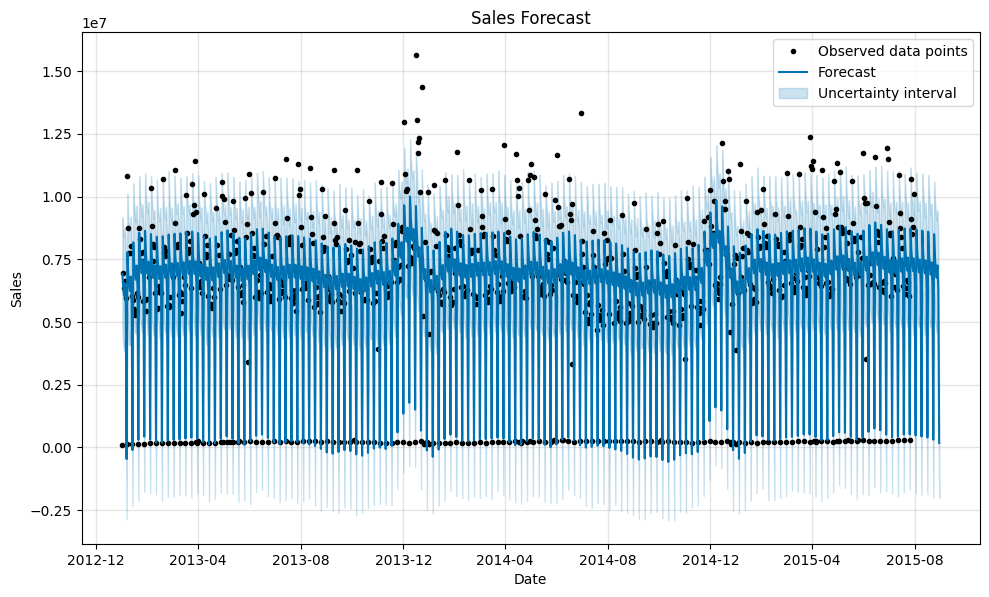

In [96]:

future_periods = 30  

future_dates = model.make_future_dataframe(periods=future_periods)

forecast = model.predict(future_dates)

fig = model.plot(forecast)
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

#### *Interpretation*

* The Prophet model has been used to generate forecasts for future sales data. The forecasted values, along with uncertainty intervals, are plotted against the observed data points. In the plot, black dots represent the observed data points, the blue line represents the forecasted values, and the sky-blue bars represent the uncertainty intervals around the forecast.

#### *Analysis*

* Observed Data Points: The black dots in the plot represent the actual sales data observed over time.

* Forecasted Values: The blue line represents the forecasted values of sales generated by the Prophet model for the future time periods. These forecasted values provide insights into the expected trend in sales over the forecast horizon.

* Uncertainty Intervals: The sky-blue bars around the forecasted values represent the uncertainty intervals or prediction intervals. These intervals indicate the range within which the actual sales values are likely to fall with a certain level of confidence. Wider uncertainty intervals imply higher uncertainty in the forecasted values.

* Model Performance: The plot allows for visual inspection of how well the Prophet model captures the underlying patterns and dynamics in the sales data. A good model fit would result in the forecasted values closely aligning with the observed data points, with uncertainty intervals capturing the variability in the data.

#### *Conclusion* 

* The plot generated by the Prophet model provides valuable insights into the forecasted trend in sales data, along with uncertainty estimates.

* The observed data points, forecasted values, and uncertainty intervals allow for a comprehensive understanding of the expected future behavior of sales data.

* Further analysis and evaluation, including assessing the accuracy of the forecasts and investigating any deviations between the forecasted values and observed data points, are necessary to validate the performance of the Prophet model and ensure the reliability of the forecasts for decision-making purposes.

C:\Users\pooji\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\pooji\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\pooji\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCa

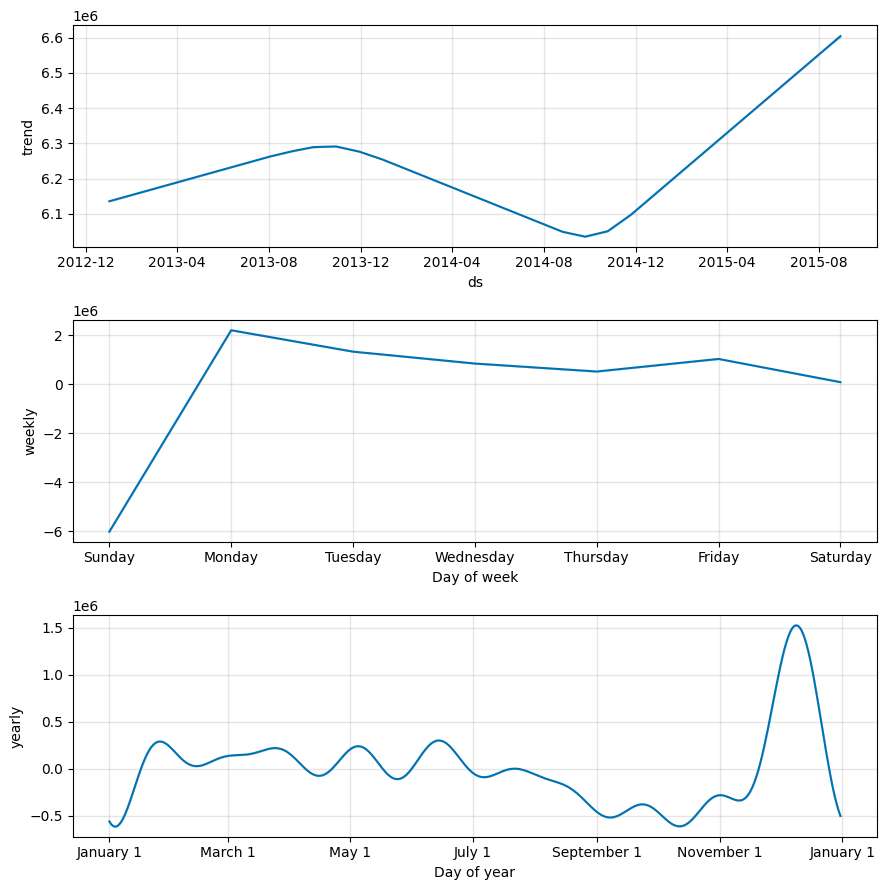

In [98]:
fig = model.plot_components(forecast)

#### *Interpretation*

* The plot_components() function of the Prophet model generates separate plots for different components of the time series data, providing insights into the underlying trends, weekly patterns, and yearly patterns.

#### *Analysis*

* Trend Component: The plot indicates that the trend component of the sales data is increasing from August 2014 to August 2015. This suggests a general upward trend in sales over this period, indicating potential growth or increasing demand.

* Weekly Seasonality: The plot reveals that sales data exhibit a weekly pattern, with higher sales typically observed on Mondays. This indicates that Mondays tend to be busier or more productive in terms of sales compared to other days of the week.

* Yearly Seasonality: The plot also shows a yearly pattern in the sales data, with higher sales typically observed in December. This could be attributed to various factors such as holiday shopping seasons, end-of-year promotions, or increased consumer spending during festive periods.

#### *Conclusion* 

* The plot_components() function of the Prophet model provides valuable insights into the different components contributing to the overall sales data, including trends, weekly patterns, and yearly patterns.

* Understanding these components can help businesses identify key drivers of sales fluctuations and plan accordingly. For example, businesses may capitalize on the observed weekly and yearly patterns by scheduling promotions or adjusting inventory levels to meet anticipated demand.

* Further analysis and interpretation of these components may lead to actionable insights and informed decision-making strategies for optimizing sales performance and maximizing revenue.